# WL labeling

This notebook present the Weisfeler-Lehman procedure used in the experiment 

In [1]:
import numpy as np
import os,sys
sys.path.append(os.path.realpath('../lib'))
from graph import Graph,wl_labeling
from ot_distances import Fused_Gromov_Wasserstein_distance
import copy
import networkx as nx
import matplotlib.pyplot as plt
import ot

def pos_diff(pos,x_off=0,y_off=0):
    pos_higher = {}
    for k, v in pos.items():
        pos_higher[k] = (v[0]+x_off, v[1]+y_off) 
    return pos_higher

We create two simple graphs with 3 nodes

In [2]:
graph=Graph()
graph2=Graph()

In [3]:
graph.add_one_attribute(0,0,'attr_name')
graph.add_one_attribute(1,0,'attr_name')
graph.add_one_attribute(2,0,'attr_name')
graph.add_one_attribute(3,5,'attr_name')
graph.add_edge((0,1))
graph.add_edge((1,2))
graph.add_edge((1,3))

In [4]:
graph2.add_one_attribute(0,0,'attr_name')
graph2.add_one_attribute(1,5,'attr_name')
graph2.add_one_attribute(2,0,'attr_name')
graph2.add_one_attribute(3,0,'attr_name')
graph2.add_edge((0,1))
graph2.add_edge((1,2))
graph2.add_edge((1,3))

We relabel their nodes according to the Weisfeler-Lehman procedure

In [5]:
H=1
gtilde=Graph()
gtilde.nx_graph=wl_labeling(graph.nx_graph,h=H,tohash=False)
gtilde2=Graph()
gtilde2.nx_graph=wl_labeling(graph2.nx_graph,h=H,tohash=False)

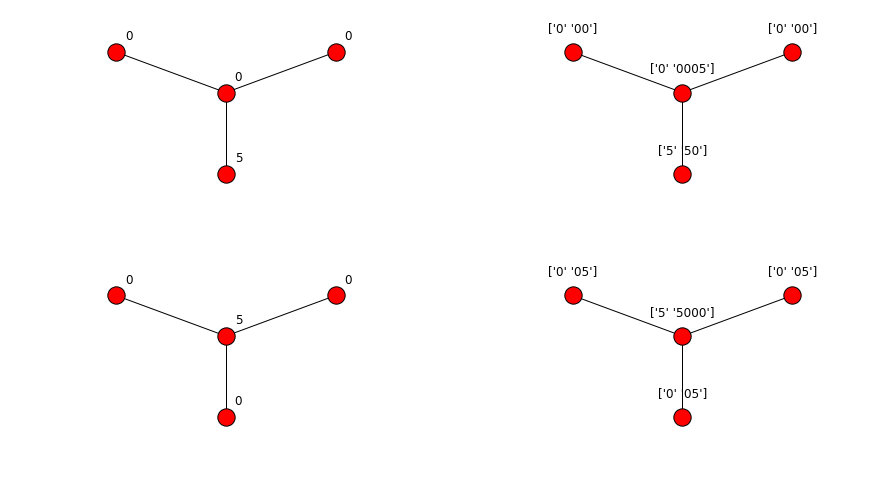

In [6]:
pos=nx.layout.kamada_kawai_layout(graph.nx_graph)

fs=12
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)

nx.draw(graph.nx_graph,pos=pos)
nx.draw_networkx_labels(graph.nx_graph,pos=pos_diff(pos,0.1,0.2)
        ,labels=nx.get_node_attributes(graph.nx_graph,'attr_name'),font_size=fs)

plt.subplot(2,2,2)
nx.draw(gtilde.nx_graph,pos=pos)
nx.draw_networkx_labels(gtilde.nx_graph,pos=pos_diff(pos,0,0.3)
                        ,labels=nx.get_node_attributes(gtilde.nx_graph,'attr_name'),font_size=fs)


plt.subplot(2,2,3)
pos=nx.layout.kamada_kawai_layout(graph2.nx_graph)

nx.draw(graph2.nx_graph,pos=pos)
nx.draw_networkx_labels(graph2.nx_graph,pos=pos_diff(pos,0.1,0.2)
        ,labels=nx.get_node_attributes(graph2.nx_graph,'attr_name'),font_size=fs)

plt.subplot(2,2,4)
nx.draw(gtilde2.nx_graph,pos=pos)
nx.draw_networkx_labels(gtilde2.nx_graph,pos=pos_diff(pos,0,0.3)
                        ,labels=nx.get_node_attributes(gtilde2.nx_graph,'attr_name'),font_size=fs)
plt.show()

We define the hamming_dist used in the experiments

In [7]:
from utils import hamming_dist

In [8]:
X=gtilde.all_matrix_attr().reshape(-1,1)
Y=gtilde2.all_matrix_attr().reshape(-1,1)
f=lambda x,y: hamming_dist(x,y)

In [9]:
X

array([['0'],
       ['00'],
       ['0'],
       ['0005'],
       ['0'],
       ['00'],
       ['5'],
       ['50']], dtype='<U4')

It is defined as 

$$d(a_{i},b_{j})=\sum_{k=0}^{H} \delta(\tau(a_{i}^{k}),\tau(b_{j}^{k}))$$

where $\delta(x,y)=1$ if $x\neq y$ else $\delta(x,y)=0$ and $\tau(a_{i}^{k})$ denotes the concatenated label at iteration $k$ in the Weisfeler-Lehman process.

In [10]:
M=ot.dist(X,Y,f)

In [11]:
M

array([[0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

For graphs of the Mutag dataset 

In [12]:
from data_loader import load_local_data

In [13]:
path='../data/'
X,y=load_local_data(path,'mutag')

In [14]:
lennodes=[]
for x in X:
    lennodes.append(len(x.nodes()))
n1=np.argsort(lennodes)[0]
n2=np.argsort(lennodes)[1]

In [15]:
graph=X[n1]
graph2=X[n2]

In [16]:
H=1
gtilde=Graph()
gtilde.nx_graph=wl_labeling(graph.nx_graph,h=H,tohash=False)
gtilde2=Graph()
gtilde2.nx_graph=wl_labeling(graph2.nx_graph,h=H,tohash=False)

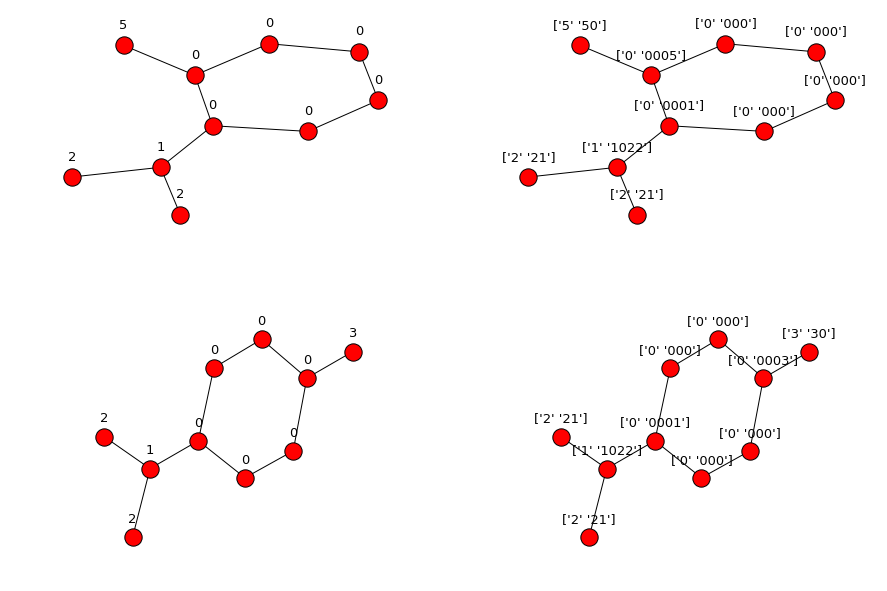

In [17]:
pos=nx.layout.kamada_kawai_layout(graph.nx_graph)

fs=13
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)

nx.draw(graph.nx_graph,pos=pos)
nx.draw_networkx_labels(graph.nx_graph,pos=pos_diff(pos,0,0.2)
        ,labels=nx.get_node_attributes(graph.nx_graph,'attr_name'),font_size=fs)

plt.subplot(2,2,2)
nx.draw(gtilde.nx_graph,pos=pos)
nx.draw_networkx_labels(gtilde.nx_graph,pos=pos_diff(pos,0,0.2)
                        ,labels=nx.get_node_attributes(gtilde.nx_graph,'attr_name'),font_size=fs)


plt.subplot(2,2,3)
pos=nx.layout.kamada_kawai_layout(graph2.nx_graph)

nx.draw(graph2.nx_graph,pos=pos)
nx.draw_networkx_labels(graph2.nx_graph,pos=pos_diff(pos,0,0.1)
        ,labels=nx.get_node_attributes(graph2.nx_graph,'attr_name'),font_size=fs)

plt.subplot(2,2,4)
nx.draw(gtilde2.nx_graph,pos=pos)
nx.draw_networkx_labels(gtilde2.nx_graph,pos=pos_diff(pos,0,0.1)
                        ,labels=nx.get_node_attributes(gtilde2.nx_graph,'attr_name'),font_size=fs)
plt.show()

In [18]:
X=gtilde.all_matrix_attr().reshape(-1,1)
Y=gtilde2.all_matrix_attr().reshape(-1,1)

In [19]:
M=ot.dist(X,Y,f)

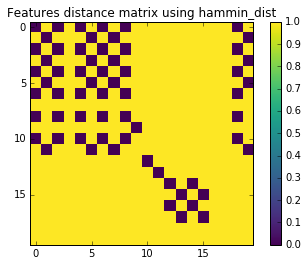

In [20]:
plt.imshow(M,interpolation='nearest',cmap='viridis')
plt.title('Features distance matrix using hammin_dist')
plt.colorbar()
plt.show()